In [1]:
import os
import numpy as np
import pandas as pd
import sentencepiece as spm
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load patents
corp_dir = "../data/"
corp_file = "netto_list_descriptions_2015-2020.txt"
corp_path = Path(corp_dir+corp_file)
with open(corp_path, 'r') as file:
    corpus = file.read().split("\n\n")
corpus[0][:5000]

'The invention is concerned with novel resinous binders containing tertiary amino groups which are useful for coating articles by means of cathodic electrodeposition. The present invention is also concerned with the preparation of such binders as well as coating compositions containing them.\nIt is known to coat electrically conducting articles with resinous binders containing tertiary amino groups by means of cathodic electrodeposition. Generally such articles are immersed in an aqueous coating composition comprising the resinous binder in the form of a salt thereof and a cross-linking agent, and an electrical current is passed between the article (cathode) and an anode which deposits the resinous binder on the article which is then stoved to cure or cross-link the resinous binder.\nKnown resinous binders having tertiary amino groups may be represented by the formula:- \n<img class="EMIRef" id="070874005-ib0001" />\nwherein m is 0 or an integer of from 1 to 6, each A1 is the same or d

In [3]:
# Tokenize documents and calculate tf-idf scores using default tokenizer and stop words
tfidf_vectorizer = TfidfVectorizer(analyzer="word", stop_words="english")
v_tfidf = tfidf_vectorizer.fit_transform(corpus)
voc_sl = tfidf_vectorizer.get_feature_names_out()

In [4]:
# Print examples from vocabulary
print("vocabulary size:", len(voc_sl))
s, t = 100, 50000
print(voc_sl[:s])
print(voc_sl[t:s+t])

vocabulary size: 179449
['00' '000' '0000' '00000' '00000000' '00000000093' '000000001'
 '00000000170' '00000000300' '00000000313' '00000000834' '00000001'
 '0000000100' '0000001' '000000445' '00000057' '000001' '00000136'
 '00000139' '00000174' '000002' '00000299' '000004' '00000431' '000005'
 '00000645' '00000676' '00000813' '00000977' '00001' '00001050'
 '0000128079' '000015' '000016' '00001800' '000019' '000019322'
 '000019505' '000019610' '000019670' '00002' '000020186' '000020922'
 '000021094' '000021253' '000021976' '0000224398' '00002300' '00002330'
 '00002600' '00002770' '00002860' '0000288' '000029' '00002940' '00003'
 '00003010' '000033' '00003310' '0000338' '00003480' '000038' '000039'
 '00004' '00004050' '00004070' '000042' '00004240' '00004290' '00004400'
 '000045' '00004580' '00004770' '00004810' '000049' '00005' '00005650'
 '00005790' '00006' '000061' '00006430' '000065' '00007' '0000727'
 '00007600' '00008' '00008490' '0000881' '00009' '000095' '0000964'
 '00009640' '0

In [5]:
def top_tfidfs(v, k, vocab):
    return vocab[v.indices[np.argsort(v.data)[:-(k+1):-1]]]

In [6]:
# Print terms with highest tf-idf score per document
for i in range(10):
    print(100 * '.')
    print(corpus[i][:400] + "...")
    print("Top tf-idf terms:", top_tfidfs(v_tfidf[i], 5, voc_sl))

....................................................................................................
The invention is concerned with novel resinous binders containing tertiary amino groups which are useful for coating articles by means of cathodic electrodeposition. The present invention is also concerned with the preparation of such binders as well as coating compositions containing them.
It is known to coat electrically conducting articles with resinous binders containing tertiary amino groups ...
Top tf-idf terms: ['resinous' 'meq' 'binder' '070874005' 'binders']
....................................................................................................
This invention is concerned with ion-exchange resins which are capable of very selective removal of heavy metal ions from aqueous solutions and methods for the synthesis of these resins. The resins of the invention are designed to selectively chelate mercury and copper ions and are particularly useful where the concentration

In [7]:
tsne_embedder = TSNE(n_components=2, init="random", learning_rate="auto")

def plot_emb(v):
    # Embed vectors in two dimensions with t-SNE
    v_tsne = tsne_embedder.fit_transform(v)
    # Plot embedded documents
    plt.figure(figsize=(7, 7))
    plt.scatter(v_tsne[:, 0], v_tsne[:, 1], s=0.5, alpha=0.8, c='k')
    plt.title("Embedded patents")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.tight_layout()
    plt.show()

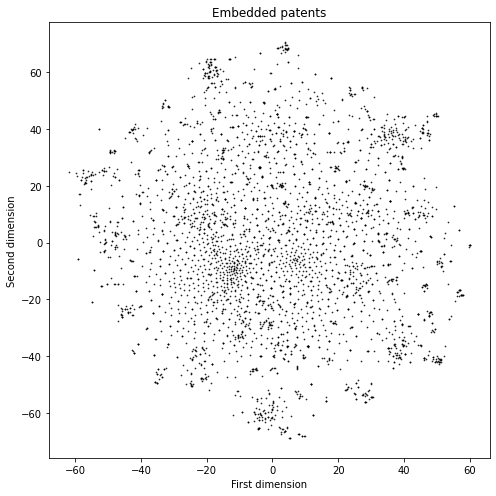

In [8]:
plot_emb(v_tfidf)

In [9]:
# Repeat experiments using SentencePiece tokenizer

In [10]:
vocab_size = 10000
model_name = "sentencepiece"
spm.SentencePieceTrainer.train(input=corp_path, model_prefix=model_name, vocab_size=vocab_size)

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../data/netto_list_descriptions_2015-2020.txt
  input_format: 
  model_prefix: sentencepiece
  model_type: UNIGRAM
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
 

In [11]:
sp_model = spm.SentencePieceProcessor(model_file=model_name+".model")
sp_model.encode("The invention is concerned with novel resinous binders.", out_type=str)

ces: 1
  escape_whitespaces: 1
  normalization_rule_tsv: 
}
denormalizer_spec {}
trainer_interface.cc(329) LOG(INFO) SentenceIterator is not specified. Using MultiFileSentenceIterator.
trainer_interface.cc(178) LOG(INFO) Loading corpus: ../data/netto_list_descriptions_2015-2020.txt
trainer_interface.cc(356) LOG(WARNING) Found too long line (13490 > 4192).
trainer_interface.cc(358) LOG(WARNING) Too long lines are skipped in the training.
trainer_interface.cc(359) LOG(WARNING) The maximum length can be changed with --max_sentence_length=<size> flag.
trainer_interface.cc(140) LOG(INFO) Loaded 1000000 lines
trainer_interface.cc(117) LOG(WARNING) Too many sentences are loaded! (1102167), which may slow down training.
trainer_interface.cc(119) LOG(WARNING) Consider using --input_sentence_size=<size> and --shuffle_input_sentence=true.
trainer_interface.cc(122) LOG(WARNING) They allow to randomly sample <size> sentences from the entire corpus.
trainer_interface.cc(385) LOG(INFO) Loaded all 110

['▁The',
 '▁invention',
 '▁is',
 '▁concern',
 'ed',
 '▁with',
 '▁novel',
 '▁resin',
 'ous',
 '▁binder',
 's',
 '.']

In [13]:
# Tokenize documents with SentencePiece model and calculate tf-idf scores
def sp_tokenize(s): return sp_model.encode(s, out_type=str)
tfidf_sp_vectorizer = TfidfVectorizer(tokenizer=sp_tokenize, analyzer="word")
v_tfidf_sp = tfidf_sp_vectorizer.fit_transform(corpus)
voc_sp = tfidf_sp_vectorizer.get_feature_names_out()
voc_sp[1000:1300]

81737 obj=9.71911 num_tokens=5758795 num_tokens/piece=70.4552
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=61302 obj=9.74573 num_tokens=5853079 num_tokens/piece=95.4794
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=61302 obj=9.74156 num_tokens=5852850 num_tokens/piece=95.4757
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=45976 obj=9.78362 num_tokens=5962985 num_tokens/piece=129.698
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=45976 obj=9.77911 num_tokens=5962643 num_tokens/piece=129.69
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=34482 obj=9.83673 num_tokens=6091265 num_tokens/piece=176.651
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=34481 obj=9.82998 num_tokens=6090703 num_tokens/piece=176.639
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=25860 obj=9.90734 num_tokens=6245845 num_tokens/piece=241.525
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=25860 obj=9.89442 num_tokens=6245

array(['>3.4', '>3.5', '>3.6', '>3.7', '>3.8', '>3.9', '>30', '>30.0',
       '>300', '>30<', '>31', '>32', '>33', '>34', '>35', '>35.0', '>36',
       '>37', '>38', '>39', '>3<', '>4', '>4.0', '>4.00', '>4.1', '>4.2',
       '>4.3', '>4.4', '>4.5', '>4.8', '>40', '>40.0', '>41', '>42',
       '>43', '>44', '>45', '>45.0', '>46', '>47', '>48', '>49', '>4<',
       '>5', '>5.0', '>5.00', '>5.2', '>5.5<', '>5.6', '>50', '>50.0',
       '>51', '>52', '>53', '>54', '>55', '>56', '>57', '>58', '>59',
       '>5<', '>6', '>6.0', '>6.2', '>6.5', '>60', '>60<', '>61', '>62',
       '>63', '>64', '>65', '>65<', '>66', '>67', '>68', '>69', '>6<',
       '>7', '>7.0', '>7.3', '>7.5', '>70', '>70<', '>72', '>73', '>74',
       '>75', '>76', '>77', '>78', '>79', '>8', '>8.0', '>8.2', '>8.3',
       '>8.4', '>8.7', '>80', '>80<', '>81', '>82', '>83', '>84', '>85',
       '>86', '>87', '>88', '>89', '>8<', '>9', '>9.0', '>9.6', '>90',
       '>90<', '>91', '>92', '>93', '>94', '>95', '>95<', '>96', '

In [14]:
# Print terms with highest tf-idf score per document
for i in range(10):
    print(100 * '.')
    print(corpus[i][:400] + "...")
    print("Top tf-idf terms:", top_tfidfs(v_tfidf_sp[i], 5, voc_sp))

....................................................................................................
The invention is concerned with novel resinous binders containing tertiary amino groups which are useful for coating articles by means of cathodic electrodeposition. The present invention is also concerned with the preparation of such binders as well as coating compositions containing them.
It is known to coat electrically conducting articles with resinous binders containing tertiary amino groups ...
Top tf-idf terms: ['▁of' '▁the' '▁binder' '.' ',']
....................................................................................................
This invention is concerned with ion-exchange resins which are capable of very selective removal of heavy metal ions from aqueous solutions and methods for the synthesis of these resins. The resins of the invention are designed to selectively chelate mercury and copper ions and are particularly useful where the concentration of metal is-low.